<a href="https://colab.research.google.com/github/ancka019/possibleCW/blob/main/spb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title
pip install geopandas
#@title
pip install contextily
pip install gmaps
pip install geoplot;

In [7]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans
import geopandas as gpd
import contextily as ctx

In [11]:
import geoplot
import geoplot.crs as gcrs

In [14]:
import requests
response = requests.get('https://dtp-stat.ru/media/opendata/sankt-peterburg.geojson')
response
df = response.json()
df
df = pd.io.json.json_normalize(df['features'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


In [30]:
df

type geometry.type  ... properties.scheme                   geometry
0      Feature         Point  ...               720  POINT (30.36351 59.94231)
1      Feature         Point  ...               740  POINT (30.35981 59.94969)
2      Feature         Point  ...               820  POINT (30.35296 59.93882)
3      Feature         Point  ...               740  POINT (30.35694 59.93158)
4      Feature         Point  ...               070  POINT (30.31759 59.93636)
...        ...           ...  ...               ...                        ...
39447  Feature         Point  ...               700  POINT (30.29749 59.91431)
39448  Feature         Point  ...               740  POINT (30.26250 59.90640)
39449  Feature         Point  ...               220  POINT (30.28280 59.91330)
39450  Feature         Point  ...               500  POINT (30.31420 59.92560)
39451  Feature         Point  ...               500  POINT (30.33190 59.91280)

[39452 rows x 26 columns]

In [22]:
df.rename(columns = {'properties.point.lat':'LATITUDE'}, inplace = True)
df.rename(columns = {'properties.point.long':'LONGITUDE'}, inplace = True)

In [23]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.LONGITUDE, df.LATITUDE))
gdf.crs = "EPSG:4326"
gdf

type geometry.type  ... properties.scheme                   geometry
0      Feature         Point  ...               720  POINT (30.36351 59.94231)
1      Feature         Point  ...               740  POINT (30.35981 59.94969)
2      Feature         Point  ...               820  POINT (30.35296 59.93882)
3      Feature         Point  ...               740  POINT (30.35694 59.93158)
4      Feature         Point  ...               070  POINT (30.31759 59.93636)
...        ...           ...  ...               ...                        ...
39447  Feature         Point  ...               700  POINT (30.29749 59.91431)
39448  Feature         Point  ...               740  POINT (30.26250 59.90640)
39449  Feature         Point  ...               220  POINT (30.28280 59.91330)
39450  Feature         Point  ...               500  POINT (30.31420 59.92560)
39451  Feature         Point  ...               500  POINT (30.33190 59.91280)

[39452 rows x 26 columns]

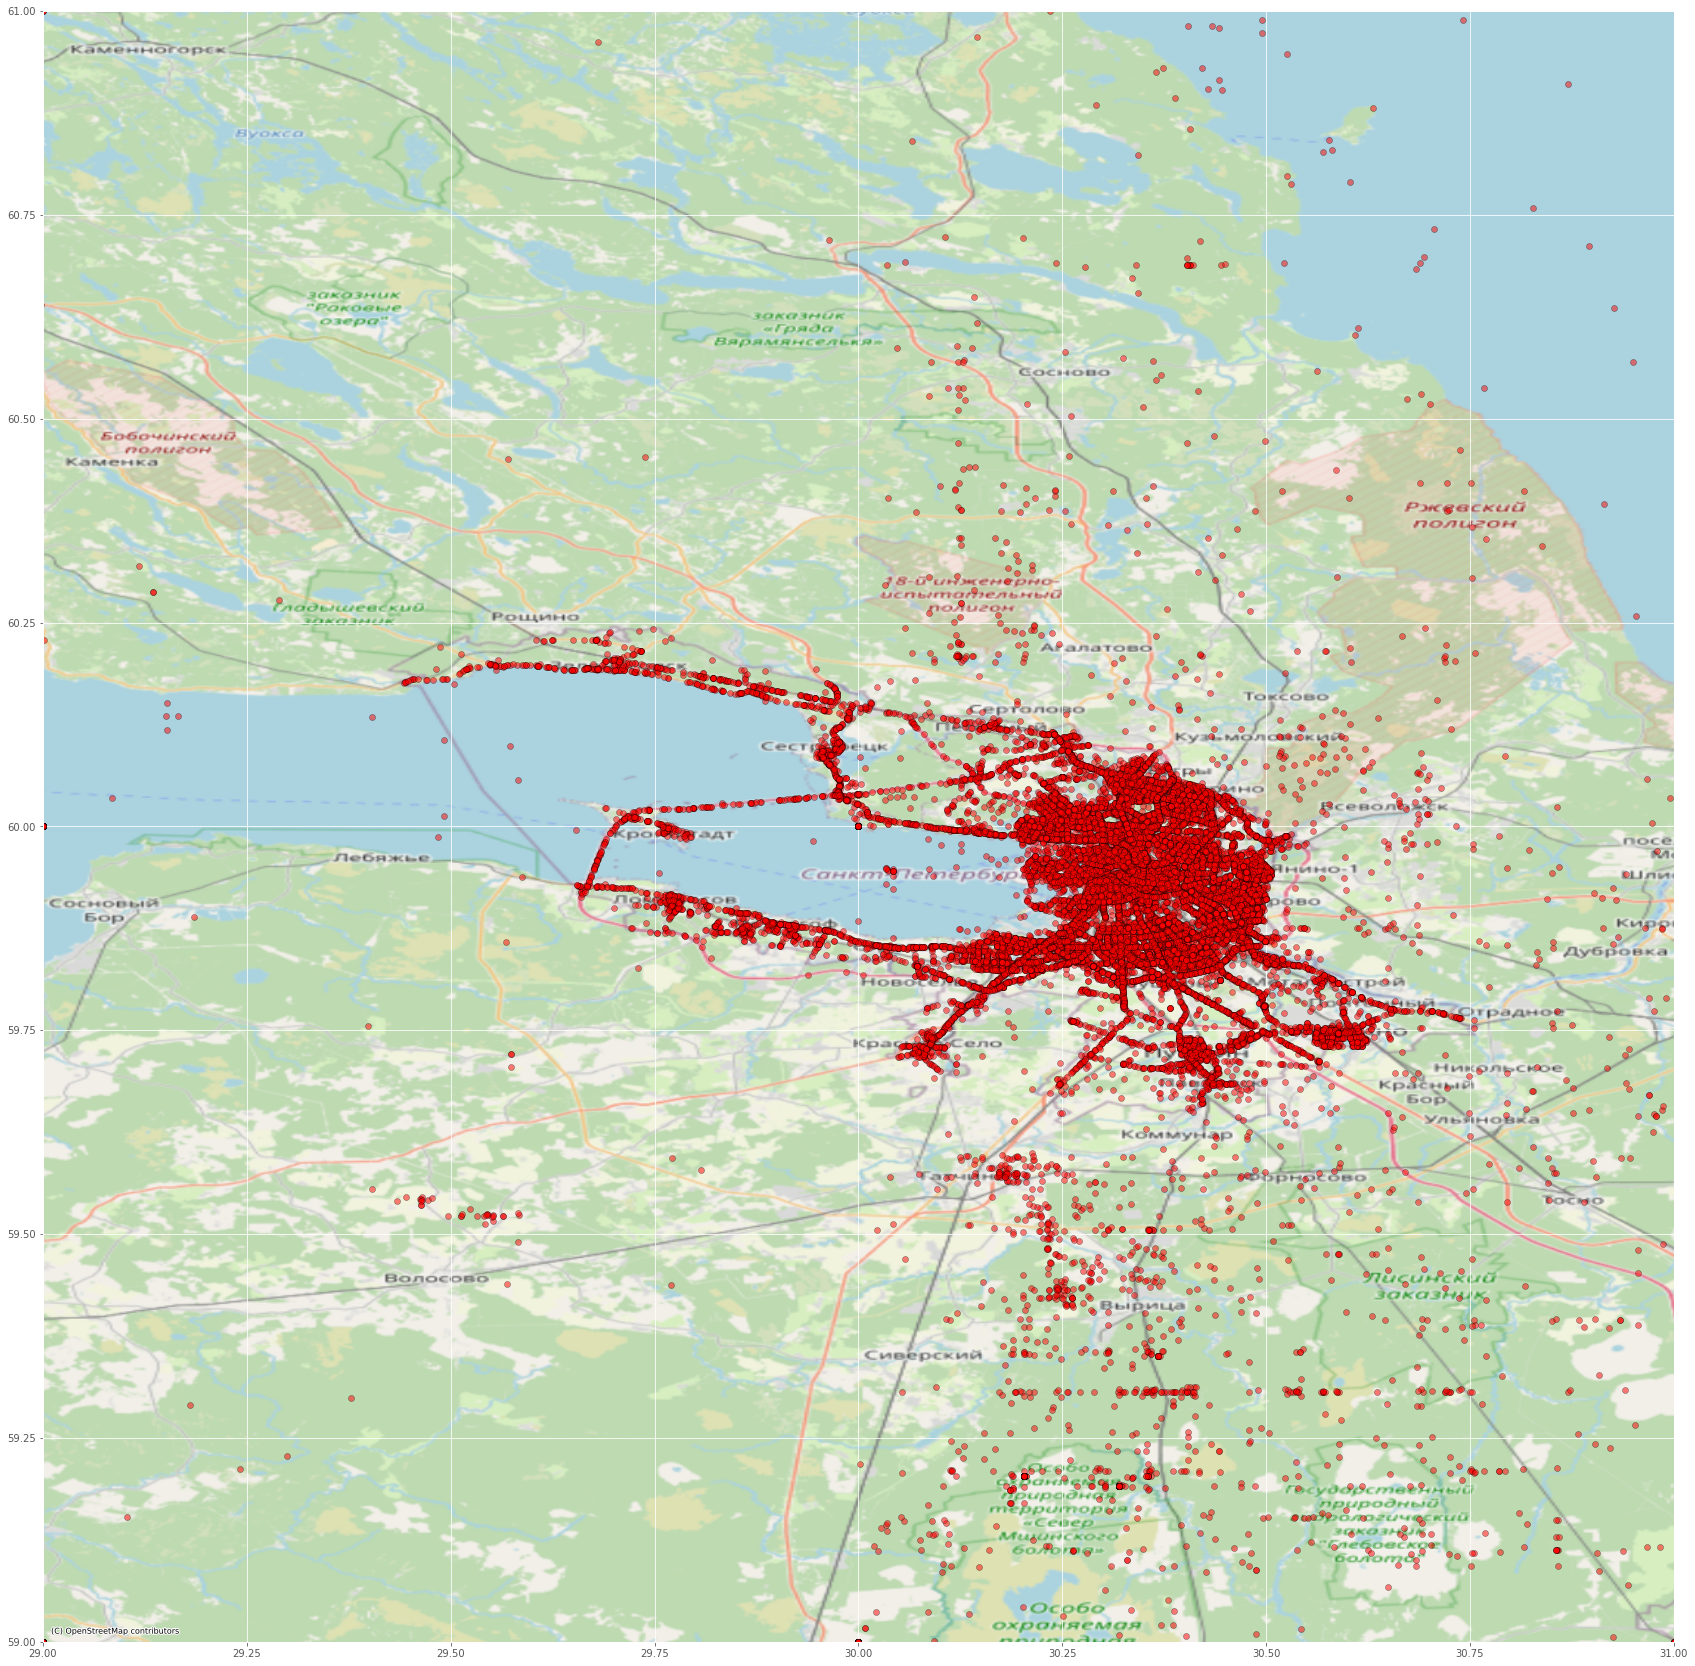

In [26]:
ax = gdf.plot(color="red", figsize=(30, 30), alpha=0.5, edgecolor='k')
ax.axis((29, 31, 59, 61))
ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)

In [35]:
response = requests.get('https://dtp-stat.ru/media/opendata/moskva.geojson')
response
mdf = response.json()
mdf
mdf = pd.io.json.json_normalize(mdf['features'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """


In [36]:
mdf.rename(columns = {'properties.point.lat':'LATITUDE'}, inplace = True)
mdf.rename(columns = {'properties.point.long':'LONGITUDE'}, inplace = True)

In [39]:
mgdf = gpd.GeoDataFrame(mdf, geometry=gpd.points_from_xy(mdf.LONGITUDE, mdf.LATITUDE))
mgdf.crs = "EPSG:4326"
mgdf

type geometry.type  ... properties.scheme                   geometry
0      Feature         Point  ...               820  POINT (37.41233 55.96112)
1      Feature         Point  ...               820  POINT (37.60600 55.88300)
2      Feature         Point  ...               070  POINT (37.77769 55.76337)
3      Feature         Point  ...               300  POINT (37.65500 55.88000)
4      Feature         Point  ...               070  POINT (37.14870 55.97855)
...        ...           ...  ...               ...                        ...
57125  Feature         Point  ...               500  POINT (37.22216 55.99039)
57126  Feature         Point  ...               300  POINT (37.45556 55.78083)
57127  Feature         Point  ...               610  POINT (37.55900 55.78800)
57128  Feature         Point  ...               820  POINT (37.66400 55.86700)
57129  Feature         Point  ...               400  POINT (37.58276 55.79236)

[57130 rows x 26 columns]

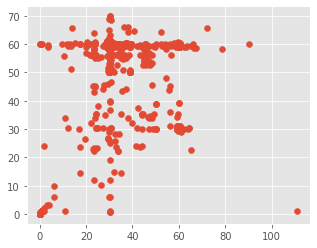

In [65]:
gdf.plot();

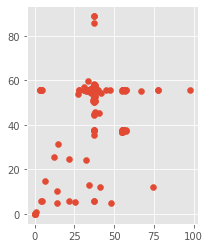

In [64]:
mgdf.plot();

In [70]:
pip install osmnx

     |████████████████████████████████| 93 kB 2.2 MB/s 
     |████████████████████████████████| 10.3 MB 36.9 MB/s 
     |████████████████████████████████| 62 kB 853 kB/s 
     |████████████████████████████████| 994 kB 57.0 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.26.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.

In [3]:
import osmnx as ox
import networkx as nx


In [ ]:
G = ox.graph_from_place('Moscow, Russia', network_type='walk')

In [ ]:
fig, ax = ox.plot_graph(G, figsize=(5,5), close=False, show=False)

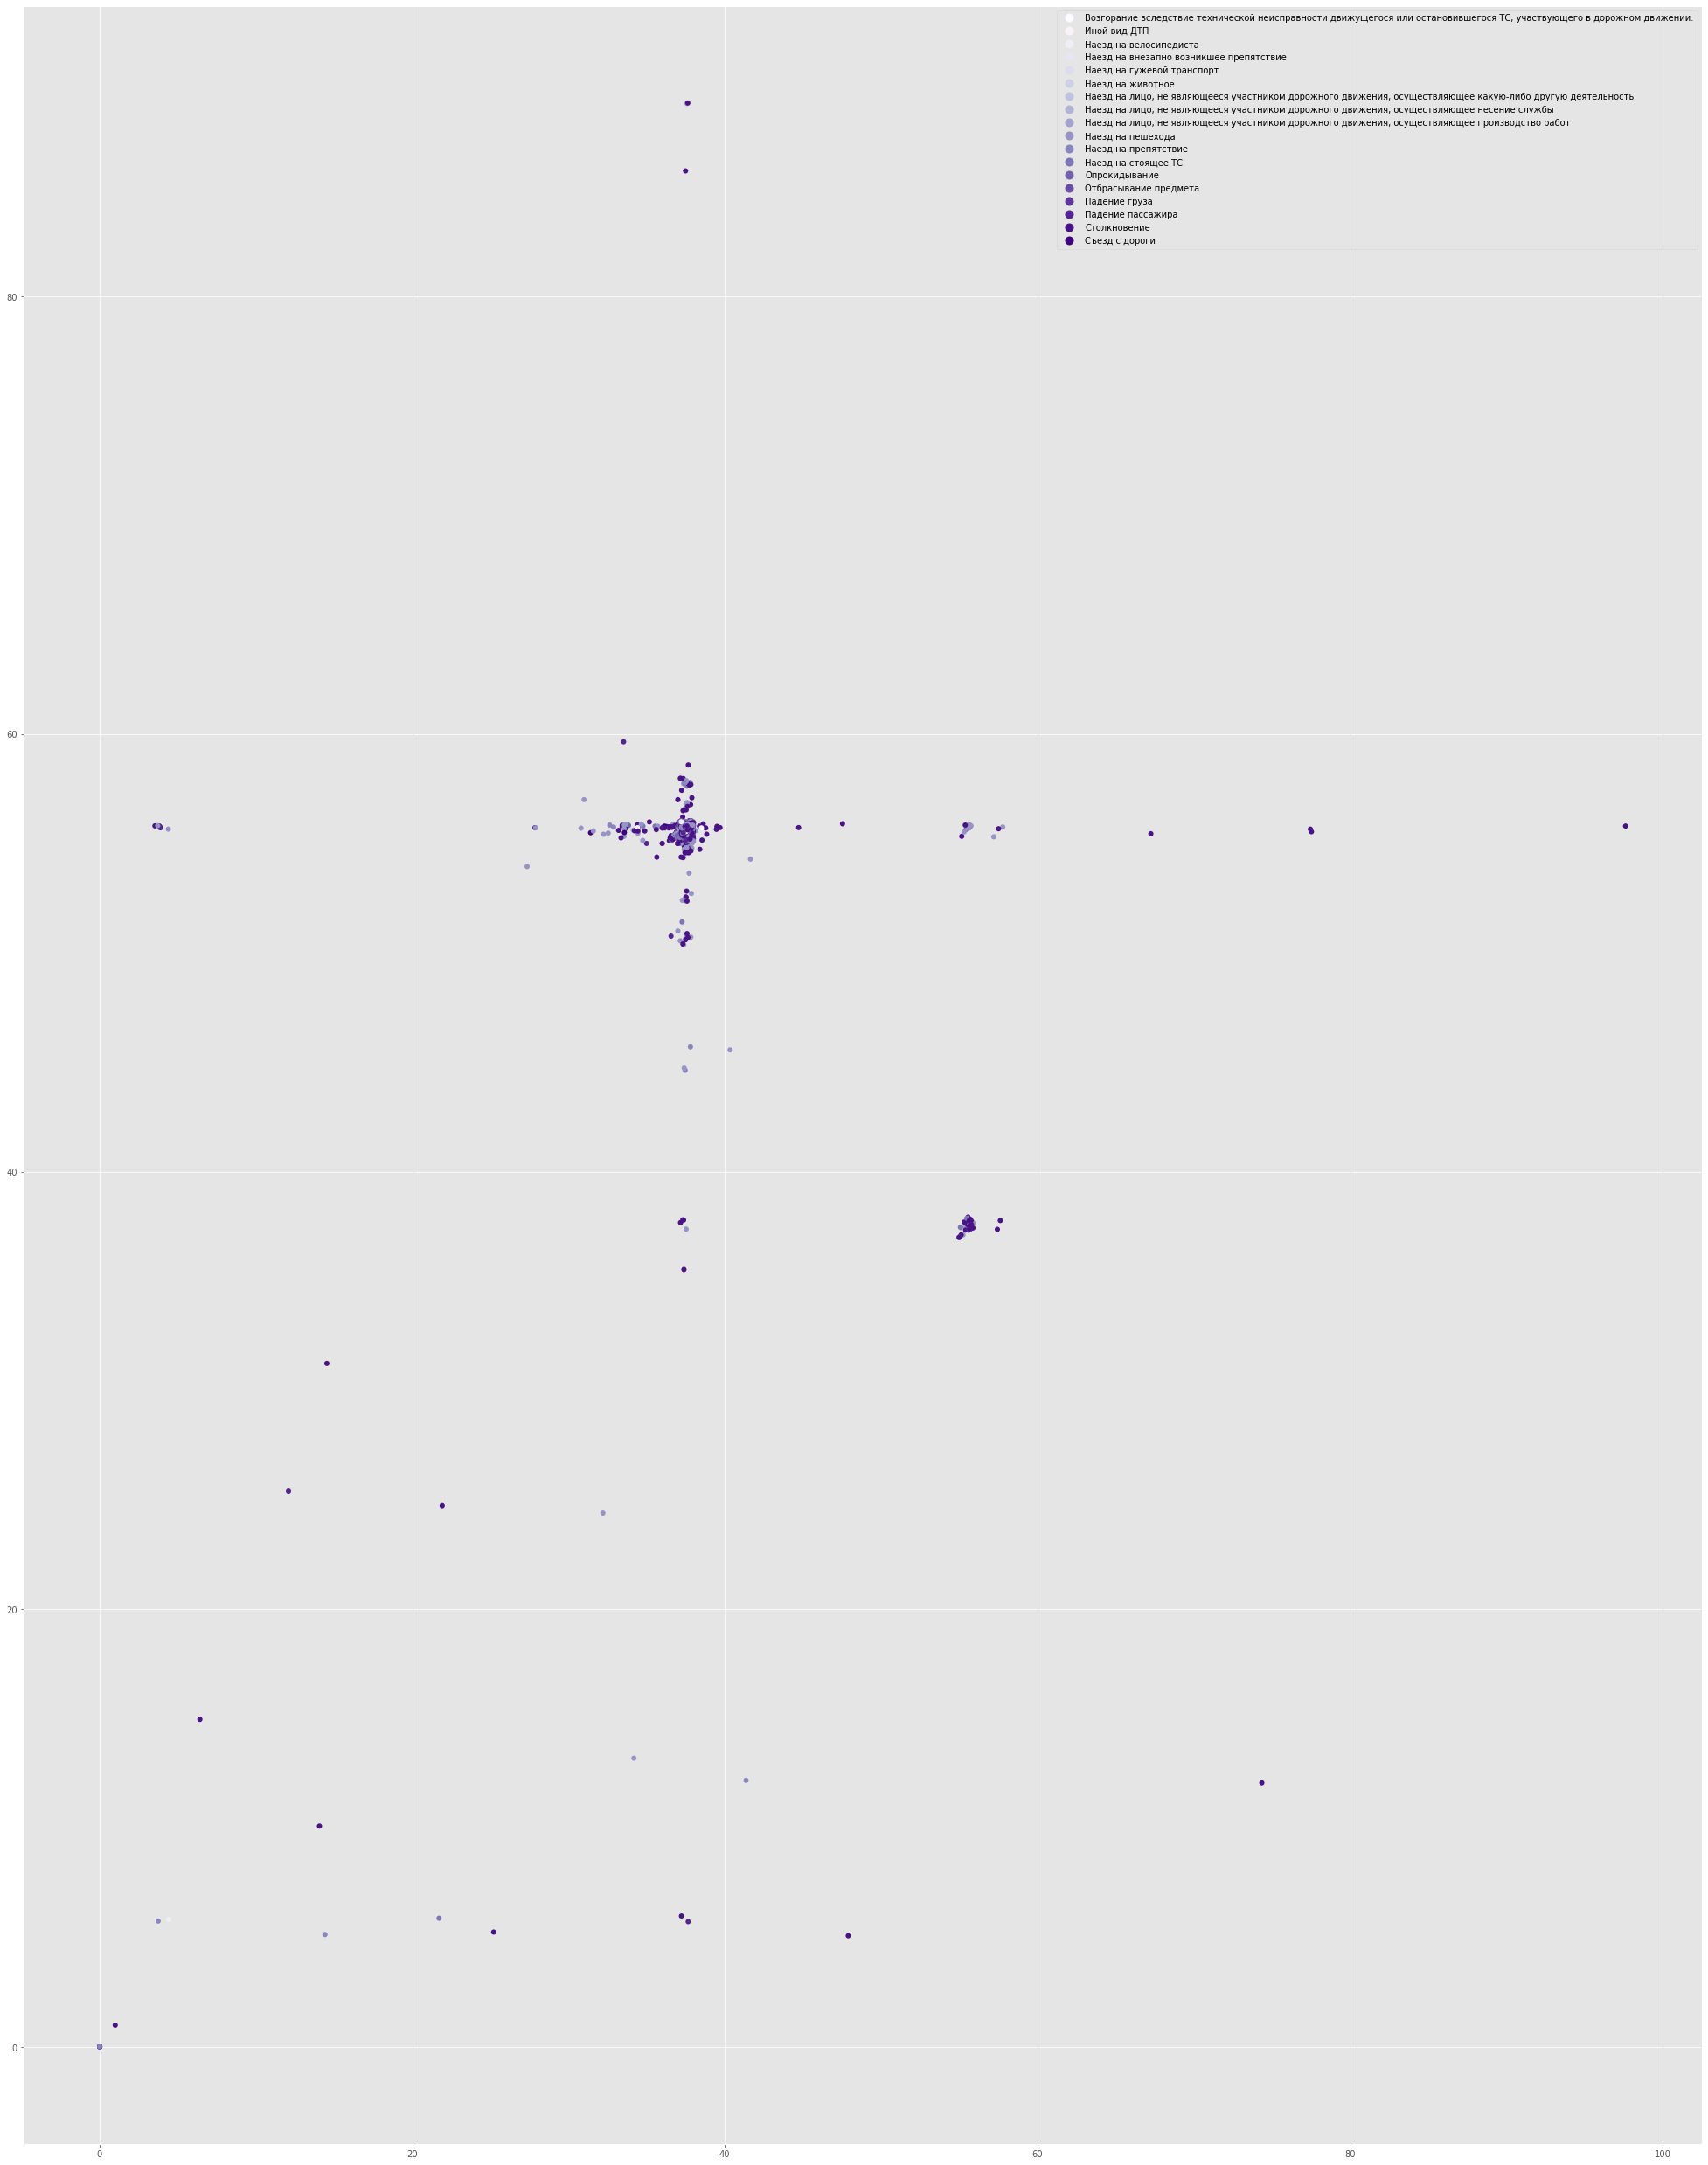

In [73]:
mgdf.plot(column = 'properties.category', linewidth=0,cmap = 'Purples' , legend=True, figsize=[45,45])